# **PyMLDA - Machine Learning for Damage Assessment**

**Authors:** Jefferson Coelho, Marcela Machado, Amanda Aryda \\
**Software version:** V.1 \\
**Tutorial description:** https://github.com/mromarcela/PyMLDA


The PyMLDA software uses additional packages required for the algorithm's operation. Therefore before the code excuttion make sure you have the followinf packages installed.

Here is a breif tutorial on how to create a virtual environment,  in case you wish, without affecting other projects on your machine. Please see below:
1. Open the comand prompt and run one at a time the following the steps 2 to 12.
2. conda create -n Teste_ML
3. conda activate Teste_ML
4. pip install openpyxl
5. pip install numpy
6. pip install matplotlib
7. pip install pandas
8. pip install seaborn
9. pip install imbalanced-learn
10. pip install -U scikit-learn
11. pip install xgboost
12. Run the PyMLDA (code).

In [ ]:
#====== Import packages need to run the code - Pandas, Numpy, matplotlib, Seaborn, warnings, imblearn, sklearn and xgboost.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore') # Ignore warnings

In [ ]:
#====== Load the Index return sheet from the Excel file into a pandas dataframe

# Load the Excel file into a DataFrame:
dataset= pd.read_excel('DI_FRAC_Exp-estimation.xlsx', sheet_name='DI_FRAC')

# Remove the 'Mass loss [%]' and 'Multiclass_classification' columns
dataset.drop(['Mass loss [%]','Multiclass classification'], axis=1, inplace=True)

# **Unsupervised**

In [ ]:
# Print header of DataFrame
dataset.head(10)

,DI-1,DI-2
0,0.6178,0.7654
1,0.8038,0.7931
2,0.6889,0.6220
3,0.6889,0.7672
4,0.8376,0.9066
5,0.7378,0.6008
6,0.7642,0.6412
7,0.5883,0.8148
8,0.6320,0.8587
9,0.5464,0.7825


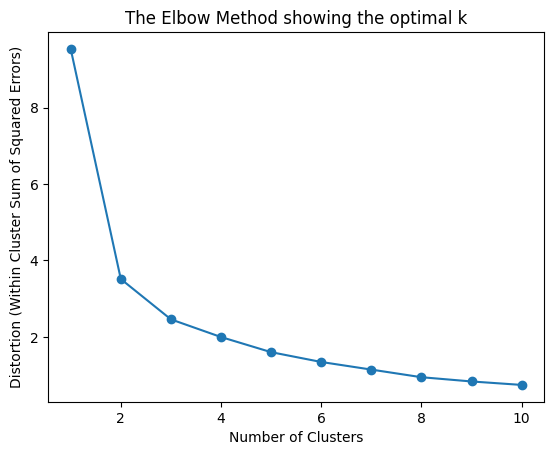

In [ ]:
# Using the elbow method to find the optimal number of clusters
wcss = []  # Within-Cluster Sum of Square
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(dataset)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

# Plot the graph of k versus WCSS
plt.plot(range(1,11),wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Within Cluster Sum of Squared Errors)')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Build the Kmeans clustering model

k = 4  # k: number of clusters
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0) # Create kemans model
y_kmeans_pred = kmeans.fit_predict(dataset) # Fitting K-Means to the dataset

In [ ]:
# Returns the clustering labels

labels=kmeans.labels_
labels

array([3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 1, 3, 0, 0, 0, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 0, 0, 0,
       0, 0, 1, 3, 1, 3, 1, 0, 3, 1, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
# Cluster data using the created model
grupos = kmeans.predict(dataset)

In [ ]:
# Create cluster feature
dataset=pd.DataFrame(dataset,columns=dataset.columns[0:3])
dataset['Clusters']=labels

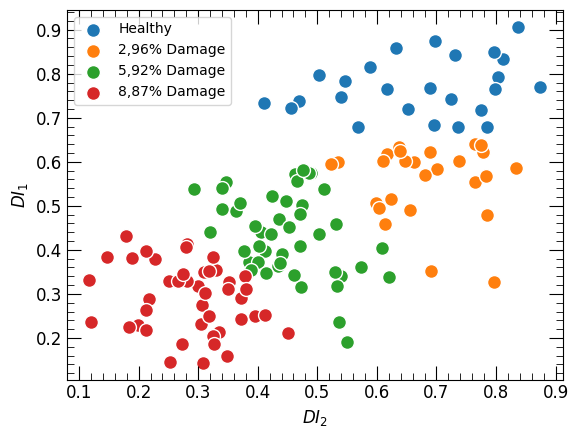

In [ ]:
#====== Plot the cluster with data points

# plt.scatter() function
plt.figure()
plt.scatter(dataset.values[grupos == 3, 0], dataset.values[grupos == 3, 1], s = 100, c = 'tab:blue', edgecolor='white', label = 'Healthy')
plt.scatter(dataset.values[grupos == 1, 0], dataset.values[grupos == 1, 1], s = 100, c = 'tab:orange', edgecolor='white', label = '2,96% Damage')
plt.scatter(dataset.values[grupos == 0, 0], dataset.values[grupos == 0, 1], s = 100, c = 'tab:green', edgecolor='white', label = '5,92% Damage') #edgecolor='black'
plt.scatter(dataset.values[grupos == 2, 0], dataset.values[grupos == 2, 1], s = 100, c = 'tab:red', edgecolor='white', label = '8,87% Damage')

# Change the appearance of ticks and tick labels.
plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)
plt.xlabel('$DI_2$', fontsize =12 )
plt.ylabel('$DI_1$', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Function add a legend
plt.legend(fontsize=12)
plt.legend(loc='upper left',fontsize=12)

# plt.grid()
plt.legend(scatterpoints=1)

# Save figure in PDF
plt.savefig('dados_exp.pdf', format='pdf', transparent=True, dpi=1200, bbox_inches='tight')

# function to show the plot
plt.show()

In [ ]:
# Visualising of New DataFrame with clusters
dataset

,DI-1,DI-2,Clusters
0,0.6178,0.7654,3
1,0.8038,0.7931,3
2,0.6889,0.6220,1
3,0.6889,0.7672,3
4,0.8376,0.9066,3
...,...,...,...
135,0.3479,0.1584,2
136,0.3255,0.2046,2
137,0.2128,0.2178,2
138,0.3260,0.1852,2


# **Supervised**

# Classification

[3 1 0 2] 

0    45
2    43
1    27
3    25
Name: Clusters, dtype: int64


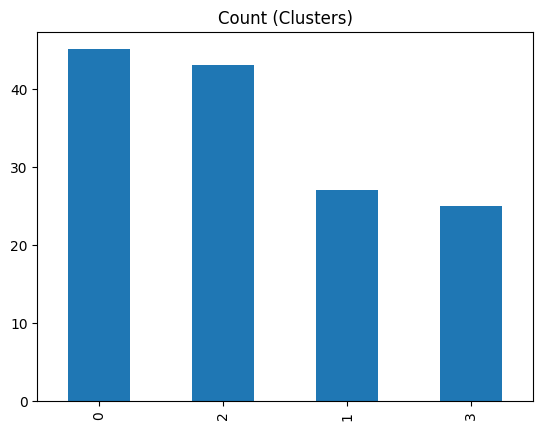

In [ ]:
# Checking data imbalance after clustering

print(dataset['Clusters'].unique(),'\n') # labels da classe - variável categórica

features = dataset.Clusters.value_counts()
print(features)
plt.figure()
features.plot(kind='bar', title='Count (Clusters)');

In [ ]:
# convert categorical columns into numerical

labelEncoder = LabelEncoder()
labelEncoder.fit(dataset['Clusters'])
dataset['Clusters'] = labelEncoder.transform(dataset['Clusters'])

dataset

,DI-1,DI-2,Clusters
0,0.6178,0.7654,3
1,0.8038,0.7931,3
2,0.6889,0.6220,1
3,0.6889,0.7672,3
4,0.8376,0.9066,3
...,...,...,...
135,0.3479,0.1584,2
136,0.3255,0.2046,2
137,0.2128,0.2178,2
138,0.3260,0.1852,2


In [ ]:
# split the data into inputs (x) and outputs (y)
X = dataset.iloc[:, :2] # inputs
y = dataset.iloc[:, 2]  # outputs

# split the data into training and testing sets ()
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Applying the undersampling technique to balance samples

rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print(y_train.shape)
print(y_train.value_counts(), '\n')

print(y_train_rus.shape)
print(y_train_rus.value_counts(),'\n')

(112,)
0    35
2    33
1    23
3    21
Name: Clusters, dtype: int64 

(84,)
0    21
1    21
2    21
3    21
Name: Clusters, dtype: int64 



# SVM

In [ ]:
# Train the SVM model on the entire training set

SVM_OvO = svm.SVC(kernel='linear', C=100, decision_function_shape='ovo') # Create SVM model - One vs One
SVM_OvO.fit(X_train_rus, y_train_rus) # fit classifier to training set

SVC(C=100, decision_function_shape='ovo', kernel='linear')

In [ ]:
# Predict the samples for testing set

y_pred= SVM_OvO.predict(X_test)

print('Classificador:', y_pred[1])
print('Valor Real:', y_test.iloc[1])

Classificador: 0
Valor Real: 0


In [ ]:
#===== Metrics to Evaluate your Classification Model SVM

# Compute and print classification metrics (Accuracy, F1-Score, Precision and Recall)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nF1-score:', f1_score(y_test, y_pred, average='micro'))
print('\nPrecision: %.3f' % precision_score(y_test, y_pred,average='micro'))
print('\nRecall: %.3f' % recall_score(y_test, y_pred,average='micro'))

# Print classification report for model
print('\nClassification report:\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.8928571428571429

F1-score: 0.8928571428571429

Precision: 0.893

Recall: 0.893

Classification report:

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.75      0.75      0.75         4
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00         4

    accuracy                           0.89        28
   macro avg       0.89      0.89      0.89        28
weighted avg       0.89      0.89      0.89        28



In [ ]:
# Cross-validation for classification

scores=cross_val_score(SVM_OvO, X, y, cv=5, scoring='accuracy')

# Print cross-validation
print("Cross-validation scores: {}". format(scores))
print("Average cross-validation score: {}". format(scores.mean()))

Cross-validation scores: [0.92857143 1.         1.         1.         0.85714286]
Average cross-validation score: 0.9571428571428571


In [ ]:
# Creating a Confusion Matrix

cm_SVM = confusion_matrix(y_test, y_pred)
cm_SVM

array([[ 8,  1,  1,  0],
       [ 1,  3,  0,  0],
       [ 0,  0, 10,  0],
       [ 0,  0,  0,  4]])

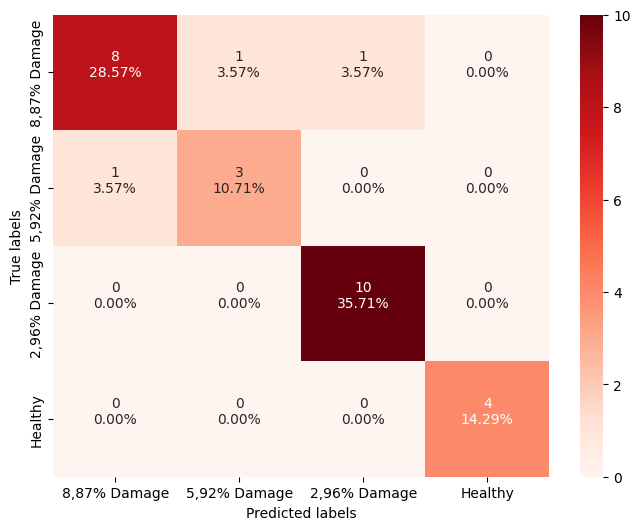

In [ ]:
# Plot Confusion Matrix SVM

plt.figure(figsize=(8,6))

group_counts = ["{0:0.0f}".format(value) for value in
                cm_SVM.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_SVM.flatten()/np.sum(cm_SVM)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(len(cm_SVM),len(cm_SVM))

ax = sns.heatmap(cm_SVM, annot=labels, fmt='', cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

ax.xaxis.set_ticklabels(['8,87% Damage', '5,92% Damage', '2,96% Damage', 'Healthy']);
ax.yaxis.set_ticklabels(['8,87% Damage', '5,92% Damage', '2,96% Damage', 'Healthy'])

# Save the plot with dpi=1200 in 'pdf'
plt.savefig('svm_cm_.pdf', format='pdf', transparent=True, dpi=1200, bbox_inches='tight' )

plt.show()

# KNN

In [ ]:
# Train the KNN model on the entire training set

knn = KNeighborsClassifier(n_neighbors = 3, metric= 'euclidean') # Create KNN model
knn.fit(X_train_rus,y_train_rus) #fit classifier to training set

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
# Predict the samples for testing set

y_pred = knn.predict(X_test)

print('Classificador:', y_pred[1])
print('Valor Real:', y_test.iloc[1])

Classificador: 0
Valor Real: 0


In [ ]:
#===== Metrics to Evaluate your Classification Model

# Compute and print classification metrics (Accuracy, F1-Score, Precision and Recall)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nF1-score:', f1_score(y_test, y_pred, average='micro'))
print('\nPrecision: %.3f' % precision_score(y_test, y_pred,average='micro'))
print('\nRecall: %.3f' % recall_score(y_test, y_pred,average='micro'))

# Print classification report for model
print('\nClassification report:\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.9285714285714286

F1-score: 0.9285714285714286

Precision: 0.929

Recall: 0.929

Classification report:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       1.00      0.75      0.86         4
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00         4

    accuracy                           0.93        28
   macro avg       0.95      0.91      0.93        28
weighted avg       0.93      0.93      0.93        28



In [ ]:
# Cross-validation for classification SVM

scores=cross_val_score(knn, X, y, cv=5, scoring='accuracy')

# Print cross-validation
print("Cross-validation scores: {}". format(scores))
print("Average cross-validation score: {}". format(scores.mean()))

Cross-validation scores: [0.96428571 0.96428571 1.         0.96428571 0.82142857]
Average cross-validation score: 0.9428571428571428


In [ ]:
# Creating a Confusion Matrix

cm_knn = confusion_matrix(y_test, y_pred)

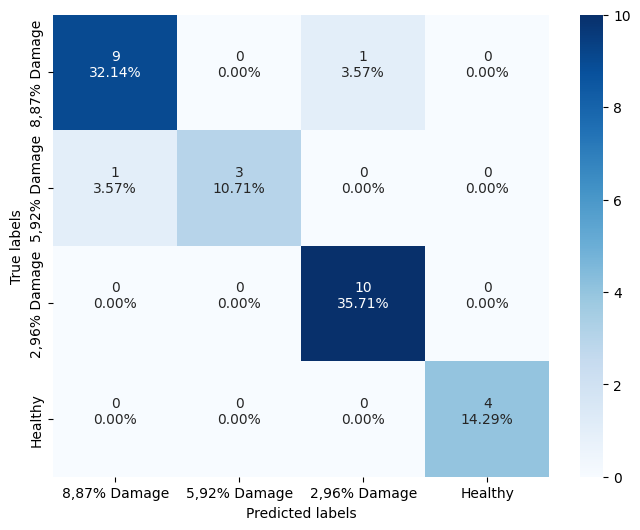

In [ ]:
# Plot Confusion Matrix KNN

plt.figure(figsize=(8,6))
group_counts = ["{0:0.0f}".format(value) for value in
                cm_knn.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_knn.flatten()/np.sum(cm_knn)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(len(cm_knn),len(cm_knn))

ax = sns.heatmap(cm_knn, annot=labels, fmt='', cmap=plt.cm.Blues)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

ax.xaxis.set_ticklabels(['8,87% Damage', '5,92% Damage', '2,96% Damage', 'Healthy']);
ax.yaxis.set_ticklabels(['8,87% Damage', '5,92% Damage', '2,96% Damage', 'Healthy'])

# Save the plot with dpi=1200 in 'pdf'
plt.savefig('knn_cm_.pdf', format='pdf', transparent=True, dpi=1200, bbox_inches='tight' )
plt.show()

# Naive Bayes

In [ ]:
# Train the Naive Bayes model on the entire training set
gnb =  GaussianNB() # Create Naive Bayes model
gnb.fit(X_train_rus, y_train_rus) # fit classifier to training set

GaussianNB()

In [ ]:
# Predict the samples for testing set

y_pred = gnb.predict(X_test)

print('Classificador:', y_pred[1])
print('Valor Real:', y_test.iloc[1])

Classificador: 0
Valor Real: 0


In [ ]:
#===== Metrics to Evaluate your Classification Model

# Compute and print classification metrics (Accuracy, F1-Score, Precision and Recall)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nF1-score:', f1_score(y_test, y_pred, average='micro'))
print('\nPrecision: %.3f' % precision_score(y_test, y_pred,average='micro'))
print('\nRecall: %.3f' % recall_score(y_test, y_pred,average='micro'))

# Printing classification Report
print('\nClassification report:\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.9285714285714286

F1-score: 0.9285714285714286

Precision: 0.929

Recall: 0.929

Classification report:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.75      0.75      0.75         4
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         4

    accuracy                           0.93        28
   macro avg       0.91      0.91      0.91        28
weighted avg       0.93      0.93      0.93        28



In [ ]:
# Cross valcross_val_score

scores=cross_val_score(gnb, X, y, cv=5, scoring='accuracy')

# Print cross-validation
print("Cross-validation scores: {}". format(scores))
print("Average cross-validation score: {}". format(scores.mean()))

Cross-validation scores: [0.96428571 0.96428571 1.         0.92857143 0.82142857]
Average cross-validation score: 0.9357142857142857


In [ ]:
# Creating a Confusion Matrix

cm_gnb = confusion_matrix(y_test, y_pred)

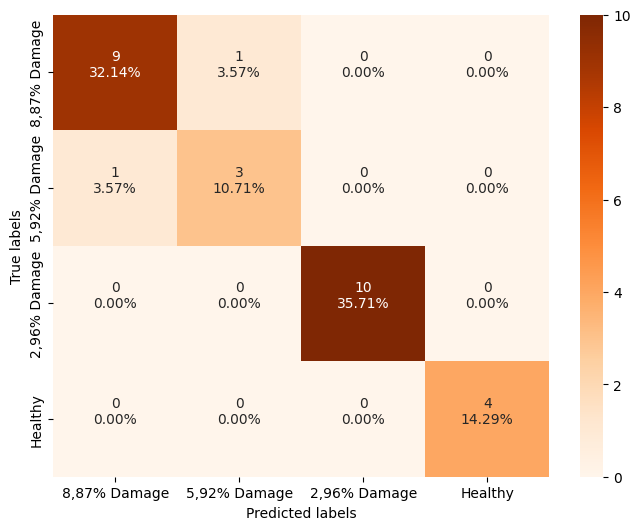

In [ ]:
# Plot Confusion Matrix Naive Bayes

plt.figure(figsize=(8,6))

group_counts = ["{0:0.0f}".format(value) for value in
                cm_gnb.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_gnb.flatten()/np.sum(cm_gnb)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(len(cm_gnb),len(cm_gnb))

ax = sns.heatmap(cm_gnb, annot=labels, fmt='', cmap=plt.cm.Oranges)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

ax.xaxis.set_ticklabels(['8,87% Damage', '5,92% Damage', '2,96% Damage', 'Healthy']);
ax.yaxis.set_ticklabels(['8,87% Damage', '5,92% Damage', '2,96% Damage', 'Healthy'])

#Save the plot with dpi=1200 in 'pdf'
plt.savefig('nb_cm_.pdf', format='pdf', transparent=True, dpi=1200, bbox_inches='tight' )
plt.show()

# Random Forest

In [ ]:
# Train the Random forest model on the entire training set

rf = RandomForestClassifier(criterion='gini') # Create Random forest model
rf.fit(X_train_rus, y_train_rus) # fit classifier to training set

RandomForestClassifier()

In [ ]:
# Predict the samples for testing set

y_pred = rf.predict(X_test)

print('Classificador:', y_pred[1])
print('Valor Real:', y_test.iloc[1])

Classificador: 0
Valor Real: 0


In [ ]:
#===== Metrics to Evaluate your Classification Model

# Compute and print classification metrics (Accuracy, F1-Score, Precision and Recall)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nF1-score:', f1_score(y_test, y_pred, average='micro'))
print('\nPrecision: %.3f' % precision_score(y_test, y_pred,average='micro'))
print('\nRecall: %.3f' % recall_score(y_test, y_pred,average='micro'))

# Print classification report for model
print('\nClassification report:\n')
print(classification_report(y_test, y_pred))


Accuracy: 0.9285714285714286

F1-score: 0.9285714285714286

Precision: 0.929

Recall: 0.929

Classification report:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.75      0.75      0.75         4
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         4

    accuracy                           0.93        28
   macro avg       0.91      0.91      0.91        28
weighted avg       0.93      0.93      0.93        28



In [ ]:
# crovss validation

scores=cross_val_score(rf, X, y, cv=5, scoring='accuracy')

# Print cross-validation
print("Cross-validation scores: {}". format(scores))
print("Average cross-validation score: {}". format(scores.mean()))

Cross-validation scores: [0.89285714 0.96428571 1.         1.         0.89285714]
Average cross-validation score: 0.95


In [ ]:
# Creating a Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred)

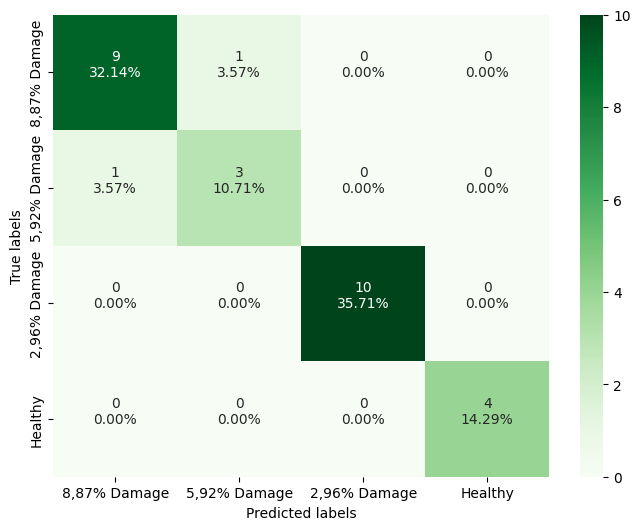

In [ ]:
# Plot Confusion Matrix Random Forest

plt.figure(figsize=(8,6))

group_counts = ["{0:0.0f}".format(value) for value in
                cm_rf.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_rf.flatten()/np.sum(cm_rf)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(len(cm_rf),len(cm_rf))

ax = sns.heatmap(cm_rf, annot=labels, fmt='', cmap=plt.cm.Greens)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

ax.xaxis.set_ticklabels(['8,87% Damage', '5,92% Damage', '2,96% Damage', 'Healthy']);
ax.yaxis.set_ticklabels(['8,87% Damage', '5,92% Damage', '2,96% Damage', 'Healthy'])

# Save the plot with dpi=1200 in 'pdf'
plt.savefig('rf_cm_.pdf', format='pdf', transparent=True, dpi=1200, bbox_inches='tight' )
plt.show()

# Decision Tree

In [ ]:
# Train the Decision Tree model on the entire training set

dtree = DecisionTreeClassifier(criterion='gini')# Create decision Tree model
dtree.fit(X_train_rus, y_train_rus) # fit classifier to training set

DecisionTreeClassifier()

In [ ]:
# Predict the samples for testing set

y_pred = dtree.predict(X_test)

print('Classificador:', y_pred[1])
print('Valor Real:', y_test.iloc[1])

Classificador: 0
Valor Real: 0


In [ ]:
#===== Metrics to Evaluate your Classification Model

# Compute and print classification metrics (Accuracy, F1-Score, Precision and Recall)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nF1-score:', f1_score(y_test, y_pred, average='micro'))
print('\nPrecision: %.3f' % precision_score(y_test, y_pred,average='micro'))
print('\nRecall: %.3f' % recall_score(y_test, y_pred,average='micro'))

# Print classification report for model
print('\nClassification report:\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.8928571428571429

F1-score: 0.8928571428571429

Precision: 0.893

Recall: 0.893

Classification report:

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.80      1.00      0.89         4
           2       0.83      1.00      0.91        10
           3       1.00      1.00      1.00         4

    accuracy                           0.89        28
   macro avg       0.91      0.93      0.91        28
weighted avg       0.91      0.89      0.89        28



In [ ]:
# Cross-validation for classification

scores=cross_val_score(dtree, X, y, cv=5, scoring='accuracy')

# Print cross-validation
print("Cross-validation scores: {}". format(scores))
print("Average cross-validation score: {}". format(scores.mean()))

Cross-validation scores: [0.85714286 0.92857143 1.         0.96428571 0.75      ]
Average cross-validation score: 0.9


In [ ]:
# Creating a Confusion Matrix

cm_dtree = confusion_matrix(y_test, y_pred)

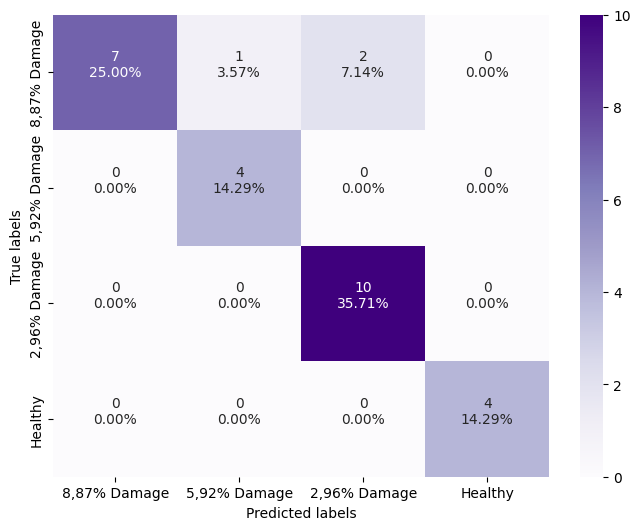

In [ ]:
# Plot Confusion Matrix Decision Tree

plt.figure(figsize=(8,6))

group_counts = ["{0:0.0f}".format(value) for value in
                cm_dtree.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_dtree.flatten()/np.sum(cm_dtree)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(len(cm_dtree),len(cm_dtree))

ax = sns.heatmap(cm_dtree, annot=labels, fmt='', cmap=plt.cm.Purples)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

ax.xaxis.set_ticklabels(['8,87% Damage', '5,92% Damage', '2,96% Damage', 'Healthy']);
ax.yaxis.set_ticklabels(['8,87% Damage', '5,92% Damage', '2,96% Damage', 'Healthy'])

# Save the plot with dpi=1200 in 'pdf'
plt.savefig('dt_cm_.pdf', format='pdf', transparent=True, dpi=1200, bbox_inches='tight' )
plt.show()

# XGBClassifier

In [ ]:
# Train the XGBoost model on the entire training set

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_classes=9) # Create XGBoost model
xgb_model.fit(X_train_rus, y_train_rus) # fit classifier to training set

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_classes=9, num_parallel_tree=None, ...)

In [ ]:
# Predict the samples for testing set

y_pred = xgb_model.predict(X_test)

print('Classificador:', y_pred[1])
print('Valor Real:', y_test.iloc[1])

Classificador: 0
Valor Real: 0


In [ ]:
#===== Metrics to Evaluate your Classification Model

# Compute and print classification metrics (Accuracy, F1-Score, Precision and Recall)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nF1-score:', f1_score(y_test, y_pred, average='micro'))
print('\nPrecision: %.3f' % precision_score(y_test, y_pred,average='micro'))
print('\nRecall: %.3f' % recall_score(y_test, y_pred,average='micro'))

# Print classification report for model
print('\nClassification report:\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.8571428571428571

F1-score: 0.8571428571428571

Precision: 0.857

Recall: 0.857

Classification report:

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.75      0.75         4
           2       0.83      1.00      0.91        10
           3       1.00      1.00      1.00         4

    accuracy                           0.86        28
   macro avg       0.86      0.86      0.86        28
weighted avg       0.86      0.86      0.85        28



In [ ]:
# Cross-validation for classification

scores=cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')

# Print cross-validation
print("Cross-validation scores: {}". format(scores))
print("Average cross-validation score: {}". format(scores.mean()))

Cross-validation scores: [0.82142857 0.96428571 1.         1.         0.71428571]
Average cross-validation score: 0.9


In [ ]:
# Creating a Confusion Matrix

cm_xgb = confusion_matrix(y_test, y_pred)

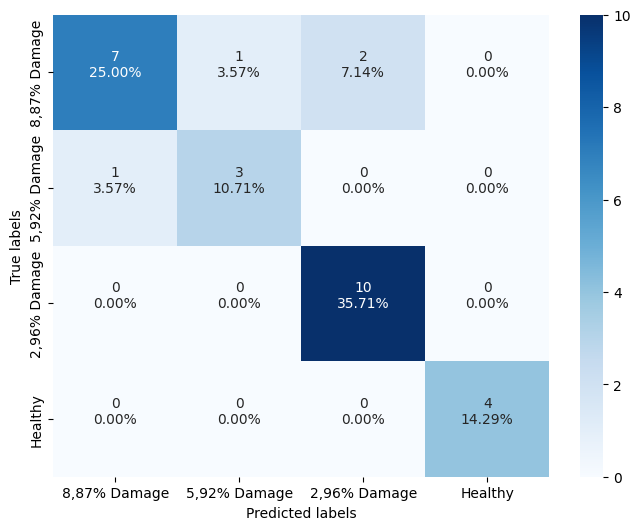

In [ ]:
# Plot Confusion Matrix XGBoost

plt.figure(figsize=(8,6))

group_counts = ["{0:0.0f}".format(value) for value in
                cm_xgb.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_xgb.flatten()/np.sum(cm_xgb)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(len(cm_xgb),len(cm_xgb))


ax = sns.heatmap(cm_xgb, annot=labels, fmt='',cmap= plt.cm.Blues)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

ax.xaxis.set_ticklabels(['8,87% Damage', '5,92% Damage', '2,96% Damage', 'Healthy']);
ax.yaxis.set_ticklabels(['8,87% Damage', '5,92% Damage', '2,96% Damage', 'Healthy'])

# Save the plot with dpi=1200 in 'pdf'
plt.savefig('xgb_cm_.pdf', format='pdf', transparent=True, dpi=1200, bbox_inches='tight' )
plt.show()

# **Regression**

In [ ]:
# Sorts the DataFrame by the specified label.
dataset = dataset.sort_values(by="Clusters", ascending=False)

In [ ]:
# split the data into inputs (x) and outputs (y)
X = dataset.iloc[:,0].values
y = dataset.iloc[:,2].values

In [ ]:
#===== Data standardization
# Scale the data using StandardScaler
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

# Preprocessing using zero mean and unit variance scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
#===== Fitting SVR to the dataset
svm_reg = SVR(kernel='linear',gamma='scale', C=10.0, epsilon=0.1) # Create SVR model
svm_reg.fit(X, y) # Fitting SVR model

SVR(C=10.0, kernel='linear')

In [ ]:
# Evaluating model using cross-validation and the mean squared error (MSE) and R-squared metrics
seed=50
np.random.seed(seed)
y_norm_Ravel=y.ravel()

scores_MSE=cross_val_score(svm_reg, X,y_norm_Ravel,cv=5,scoring='neg_mean_squared_error')
print("MSE_ Cross-validation scores: {}". format(scores_MSE))
print("Average Kfold cross-validation MSE_score: {}".format(scores_MSE.mean()))

scores_R2=cross_val_score(svm_reg, X, y_norm_Ravel,cv=5,scoring='r2')
print("\nR2_Cross-validation scores: {}". format(scores_R2))
print("Average R2_Cross-validation scores: {}".format(scores_R2.mean()))

MSE_ Cross-validation scores: [-3.48090018 -4.34977206 -0.06822849 -2.02224227 -2.21453319]
Average Kfold cross-validation MSE_score: -2.4271352344377872

R2_Cross-validation scores: [-4.35852259e+01 -3.52895434e+32  6.58630144e-01 -9.38848563e+00
 -4.49160691e+31]
Average R2_Cross-validation scores: -7.956230064581219e+31


In [ ]:
#===== Data standardization for new data
X2 = dataset.iloc[:,2].values
X2 = X2.reshape(len(X2),1)

sc_X2 = StandardScaler()
X2 = sc_X2.fit_transform(X)

In [ ]:
# Predicting a new result
y_test_pred = svm_reg.predict(sc_X2.transform(X2))

# Convert y_test_pred to 2D
y_test_pred = y_test_pred.reshape(-1,1)

In [ ]:
# Taking the inverse of the scaled value
y_test_pred_inv = sc_y.inverse_transform(y_test_pred)

In [ ]:
# Create a simple Pandas DataFrame
y_pred_damage = pd.DataFrame(y_test_pred_inv, columns = ['Damage_pred'])

In [ ]:
# Taking the inverse of the scaled value
y_real_inv = sc_y.inverse_transform(y)

# Data standardization - inverse transform
y_real_damage = pd.DataFrame(sc_y.inverse_transform(y), columns = ['Damage_real']).astype(int)

In [ ]:
# Combining dataFrame real e predict.
data_result = pd.merge(y_real_damage, y_pred_damage, left_index = True, right_index = True, how = "inner")

In [ ]:
# Compute and Printing the mean
mean_damage_prev = data_result.groupby('Damage_real')[['Damage_pred']].mean().sort_values(by='Damage_real',ascending=True).reset_index()
print(mean_damage_prev)

   Damage_real  Damage_pred
0            0     1.491445
1            1     1.079174
2            2     1.783071
3            3     1.097771


In [ ]:
# Compute and Printing the standard deviation
Std_damage_prev = data_result.groupby('Damage_real')[['Damage_pred']].std().sort_values(by='Damage_real',ascending=True).reset_index()
print(Std_damage_prev)

   Damage_real  Damage_pred
0            0     0.133627
1            1     0.148975
2            2     0.139427
3            3     0.234451


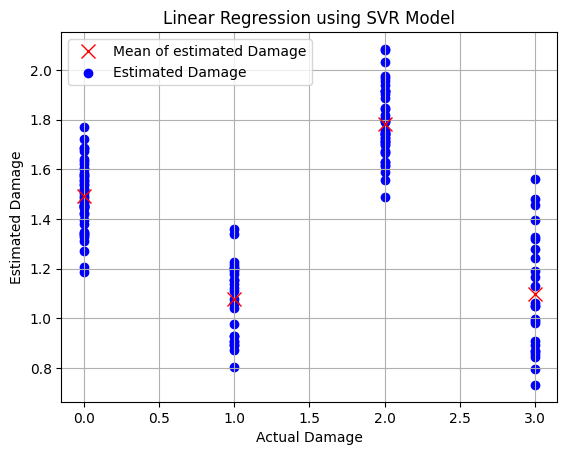

In [ ]:
#===== Plot predicted values vs the true value

# Mean of Grouped Data
data_result.groupby('Damage_real')[['Damage_pred']].mean().sort_values(by='Damage_real').plot(style=['x'], mec='r', markersize=10)

# Creating Scatter Plots
plt.scatter(data_result["Damage_real"], data_result["Damage_pred"] , color = 'blue')

# add the title to the plot
plt.title('Linear Regression using SVR Model')
# label x axis
plt.xlabel('Actual Damage')
# label y axis
plt.ylabel('Estimated Damage')
# print the plot
plt.legend([ "Mean of estimated Damage", "Estimated Damage"])

#plt.ylim([0, 90])
#plt.xlim([0, 90])

plt.grid()
#plt.savefig('SVR_Estim_6th.pdf', format='pdf', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Replaceing value of DataFrame
data_result.loc[data_result.Damage_real==0.0,'Damage_real']='5,92% Damage'
data_result.loc[data_result.Damage_real==1.0,'Damage_real']='2,96% Damage'
data_result.loc[data_result.Damage_real==2.0,'Damage_real']='8,87% Damage'
data_result.loc[data_result.Damage_real==3.0,'Damage_real']='Healthy'

In [ ]:
# Separate data into a series of groups by applying criteria by creating a groupby object
groups_damage = data_result.groupby(data_result.Damage_real)
damage0 = groups_damage.get_group('5,92% Damage')
damage1 = groups_damage.get_group('2,96% Damage')
damage2 = groups_damage.get_group('8,87% Damage')
damage3 = groups_damage.get_group('Healthy')

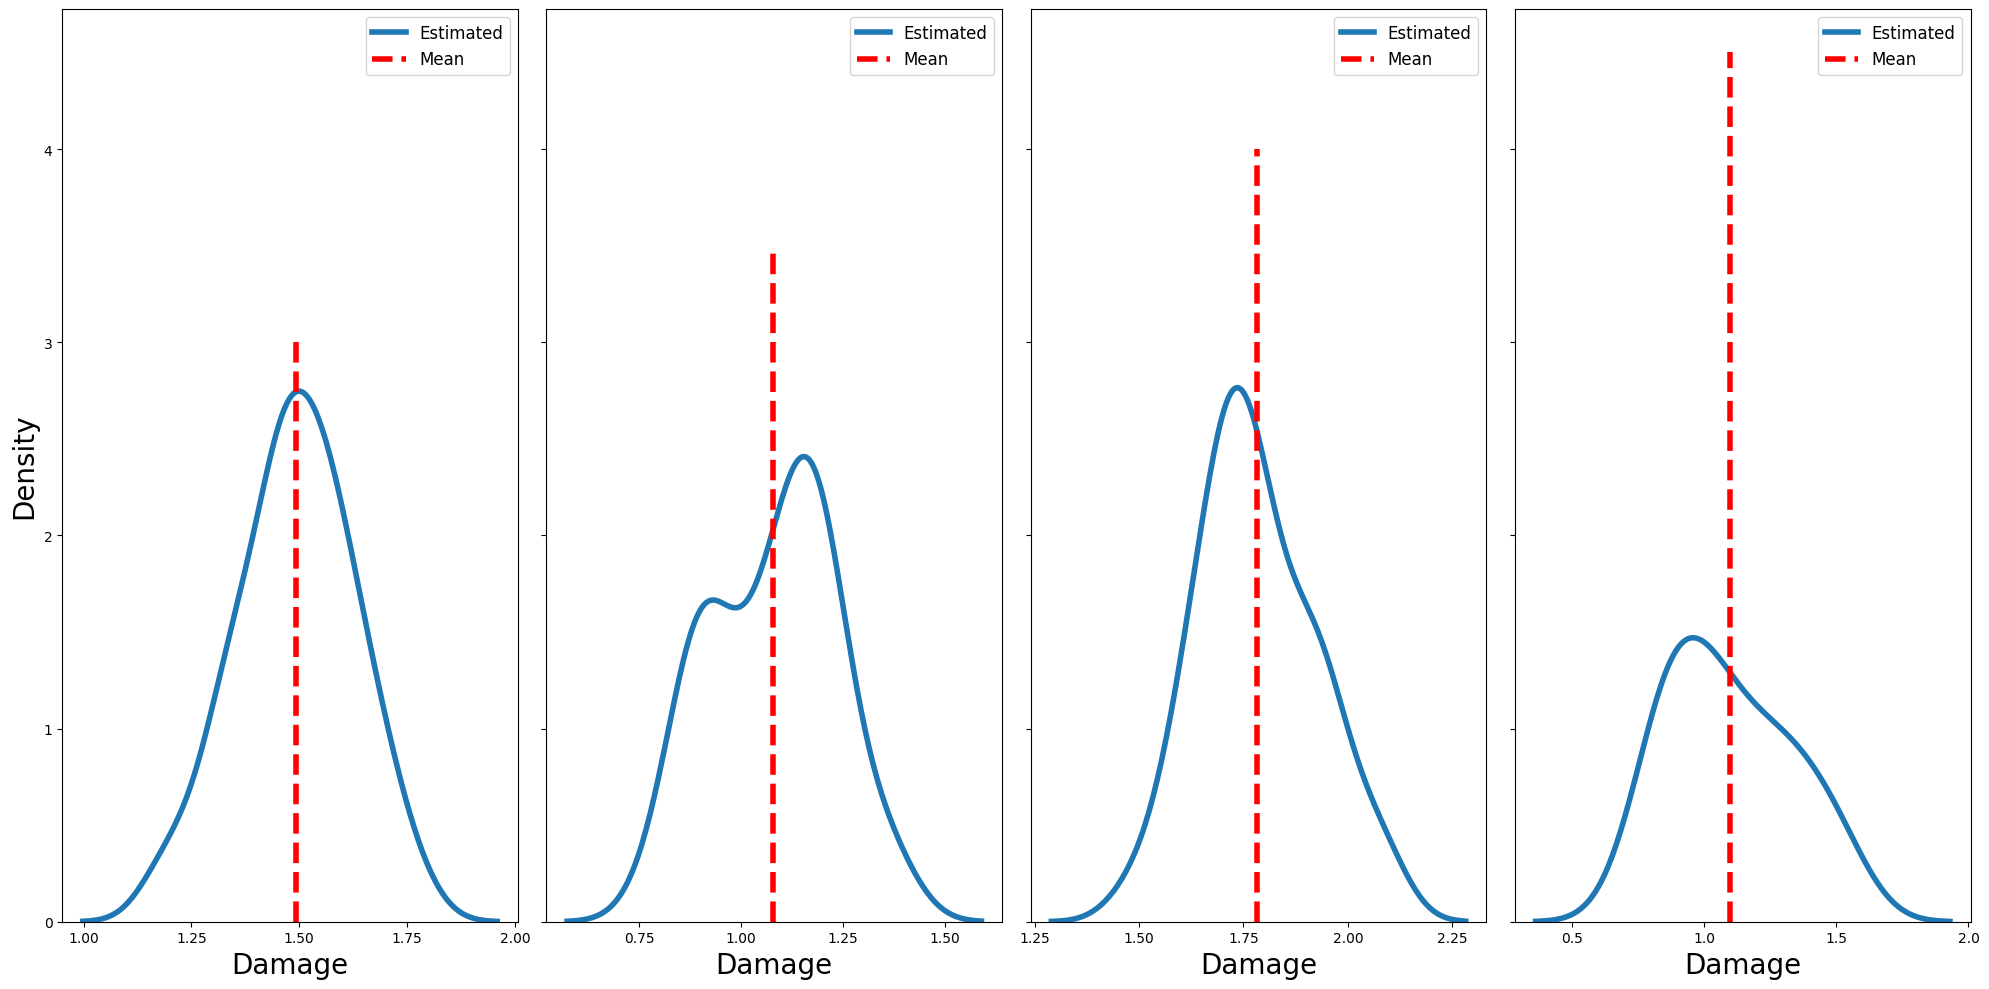

In [ ]:
# Plotting the density plot - visualizing the distribution of observations in dataset,
f, (axes1, axes2, axes3, axes4)=plt.subplots(ncols=4,figsize=(20,10), sharey=True)# sharex=True, sharey=True)

d0 = sns.kdeplot(damage0, ax=axes1, color='blue', label='Estimated',linewidth=4)
d1 = sns.kdeplot(damage1, ax=axes2, color='blue', label='Estimated',linewidth=4)
d2 = sns.kdeplot(damage2, ax=axes3, color='blue', label='Estimated',linewidth=4)
d3 = sns.kdeplot(damage3, ax=axes4, color='blue', label='Estimated',linewidth=4)
#a80 = sns.kdeplot(data_result['Torq_prev80'], ax=axes5, color='blue', label='Estimated (80 cNm)',linewidth=4)

ticks10 = max(d0.get_yticks())
d0.vlines(x=np.mean(damage0['Damage_pred']) , ymin=0, ymax=ticks10, color='red', linestyle='--', label='Mean',linewidth=4)
ticks20 = max(d1.get_yticks())
d1.vlines(x=np.mean(damage1['Damage_pred']) , ymin=0, ymax=ticks20, color='red', linestyle='--', label='Mean',linewidth=4)
ticks30 = max(d2.get_yticks())
d2.vlines(x=np.mean(damage2['Damage_pred']) , ymin=0, ymax=ticks30, color='red', linestyle='--', label='Mean',linewidth=4)
ticks60 = max(d3.get_yticks())
d3.vlines(x=np.mean(damage3['Damage_pred']) , ymin=0, ymax=ticks60, color='red', linestyle='--', label='Mean',linewidth=4)
#ticks80 = max(a80.get_yticks())
#a80.vlines(x=np.mean(data_result['Torq_prev80']) , ymin=0, ymax=ticks80, color='red', linestyle='--', label='Mean',linewidth=4)


d0.set_xlabel("Damage", fontsize=20)
d1.set_xlabel("Damage", fontsize=20)
d2.set_xlabel("Damage", fontsize=20)
d3.set_xlabel("Damage", fontsize=20)
#a80.set_xlabel("Damage", fontsize=20)
d0.set_ylabel("Density", fontsize=20)
d1.set_ylabel("Density", fontsize=20)
d2.set_ylabel("Density", fontsize=20)
d3.set_ylabel("Density", fontsize=20)
#a80.set_ylabel("Density", fontsize=20)
d0.legend(fontsize=12, loc='upper right')
d1.legend(fontsize=12, loc='upper right')
d2.legend(fontsize=12, loc='upper right')
d3.legend(fontsize=12, loc='upper right')
#a80.legend(fontsize=12, loc='upper right')

#a10.set_ylim(0, 0.19)
#a20.set_ylim(0, 0.19)
#a30.set_ylim(0, 0.19)
#a60.set_ylim(0, 0.19)
#a80.set_ylim(0, 0.19)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

plt.tight_layout()
#plt.savefig('dist_damage.pdf', format='pdf', transparent=True, dpi=300)